# Aplicando Data Augmentation

En este pequeño ejercicio veremos una forma muy simple de aplicar data augmentation utilizando `keras`


In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

## 1: Importando bibliotecas necesarias


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

## 2: Definiendo nuestro generador de imágenes


In [5]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=[0.4, 1.5],
)

Toda la información sobre `ImageDataGenerator` la puedes encontrar [aqui](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)


## 3: Cargando una imagen de ejemplo


In [6]:
img = load_img("../data/Mara.jpeg")

x = img_to_array(img)

In [7]:
print(x.shape)

(800, 600, 3)


In [8]:
x = x.reshape((1,) + x.shape)

In [9]:
print(x.shape)

(1, 800, 600, 3)


## 4: Empezamos a generar alteraciones de la imagen original

Nota: Como en este ejemplo solo tenemos una imagen, entonces el batch_size debe ser igual a 1. A pesar de que sea una sola imagen, `batch` es un arreglo de imágenes, por eso accedemos a cada imagen unitaria del batch de tamaño 1 como `batch[0]`


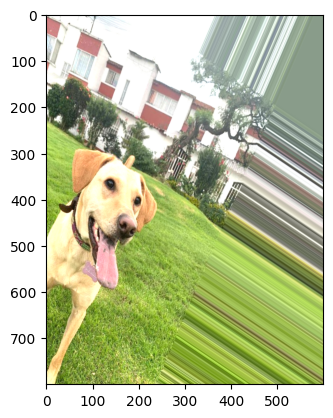

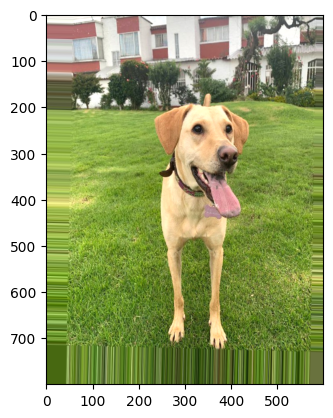

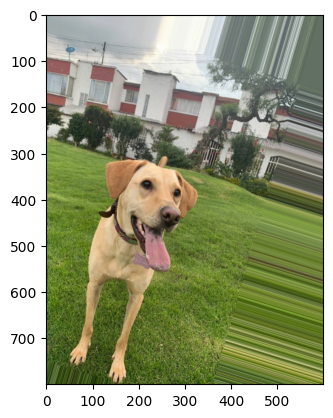

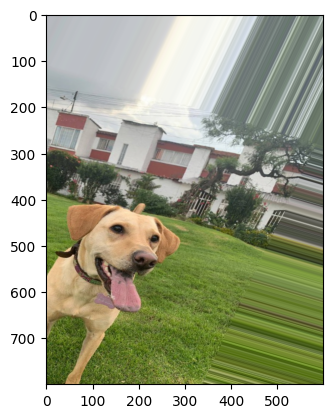

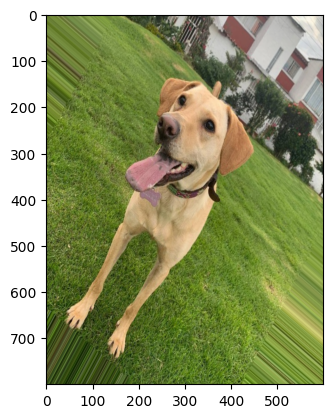

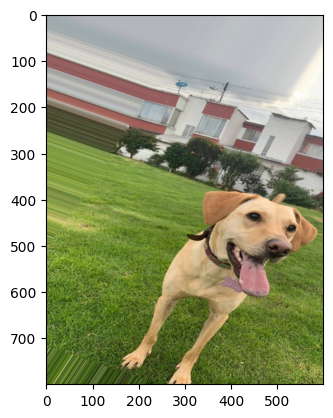

In [11]:
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.imshow(array_to_img(batch[0]))
    plt.show()
    if i == 5:
        break

Adicionalmente, existe una forma de generar estás imágenes tomando como referencia un directorio:


In [12]:
train_generator = datagen.flow_from_directory(
    "../data/cats_and_dogs/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
)

Found 2000 images belonging to 2 classes.


In [13]:
train_generator[0][0].shape

(32, 150, 150, 3)

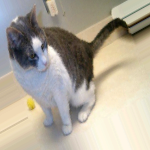

In [14]:
array_to_img(train_generator[0][0][1])